# [코드 필사]

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O (e.g. pd. read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None # defalut='warn'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


colab에서 dataset을 가져오기 위한 연동작업 수행

In [4]:
import os

path = "/content/drive/MyDrive/Colab Notebooks"
files = os.listdir(path)
print(files)

['movies_test.csv', 'movies_train.csv', 'sentimentdataset.mat', '예비8기 신아영(ML).ipynb', 'ESAA_YB_WEEK1_assignment.ipynb', 'YB0307_Numpy_exercises1.ipynb', 'YB0307_Numpy_exercises.ipynb', 'titanic_train.csv', '파이썬 머신러닝 완벽가이드_데이터 핸들링: 판다스 .ipynb', '0310_ transcription_assignment_ ch10_시각화.ipynb', 'Untitled (3)', 'YB0314(1)_grouping_occupation_Exercise.ipynb', 'YB0314(2)_getting_and_knowing_occupation_Exercises.ipynb', '0315_transcription_assignment_Seaborn.ipynb', 'Untitled (2)', 'ESAA_YB_미니_프로젝트1_train.ipynb', '0317_kaggle_.ipynb', 'aisles.csv', 'departments.csv', 'order_products__train.csv', 'orders.csv', 'order_products__prior.csv', '0317_simple exploration notebook_Instacart의 사본', 'Untitled (1)', 'naive_bayes_classifier_practice_colab_sol.ipynb', '0319_one_layer_logistic_regression_toy_practice_sol.ipynb', '0319_one_layer_logistic_regression_toy_practice.ipynb', '0317_simple exploration notebook_Instacart (1)', 'Untitled', 'products.

In [5]:
order_products_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/order_products__train.csv')
order_products_prior_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/order_products__prior.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/orders.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/products.csv')
aisles_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aisles.csv')
departments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/departments.csv')

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
위의 코드는 kaggle에 존재하던 코드로 subprocess 내의 모듀을 이용하여 input 디렉토리 내 파일을 가져오는 작업을 수행하고, 해당 파일의 문자열을 UTF-8의 문자열로 변환하는 작업을 수행함

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


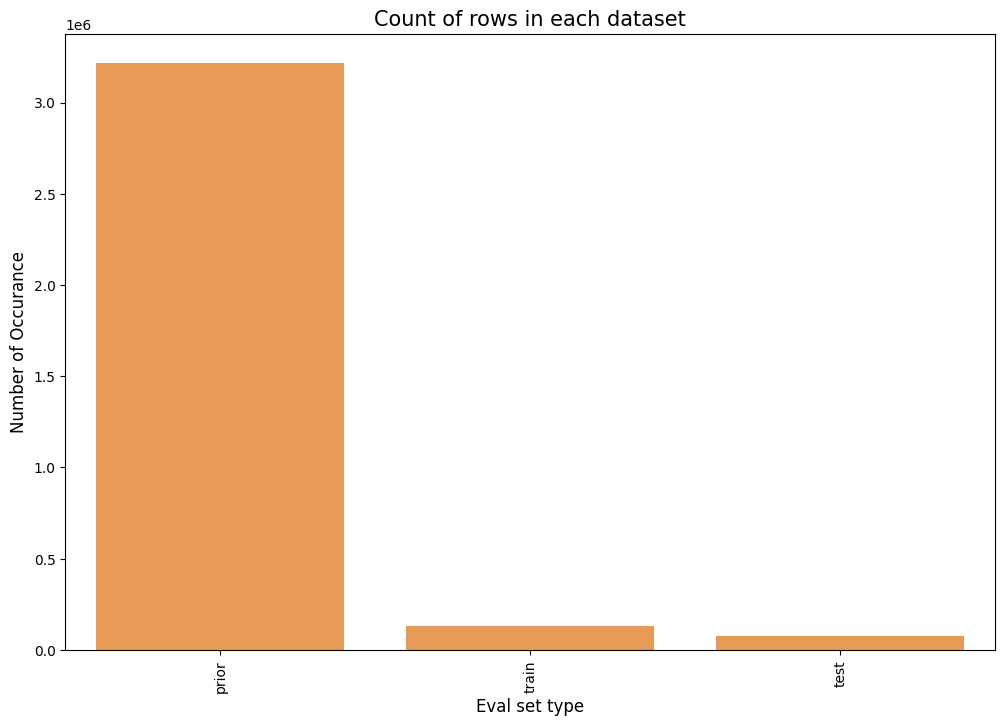

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x= cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurance', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

[그래프 유의사항]
- barplot의 경우, x인자와 y인자를 직접적으로 입력해주어야 함 (ㅇpositional arguments로 x와 y를 입력받지 않기 때문)

[그래프 설명]
- dataset의 종류에 따른 이들이 행 개수를 barplot형태로 나타내었다.

In [ ]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs = orders_df.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


각각 dataset이 가진 중복되지 않은 userid를 표로 나타내니 다음과 같았다.
즉 206209명의 전체 고객 중  평가데이터는 75000명, 학습데이터는 131209 명으로 배정되어 있음을 확인할 수 있었다.  

<ipython-input-10-91160c839638>:1: FutureWarning: The provided callable <function max at 0x79a107a50900> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


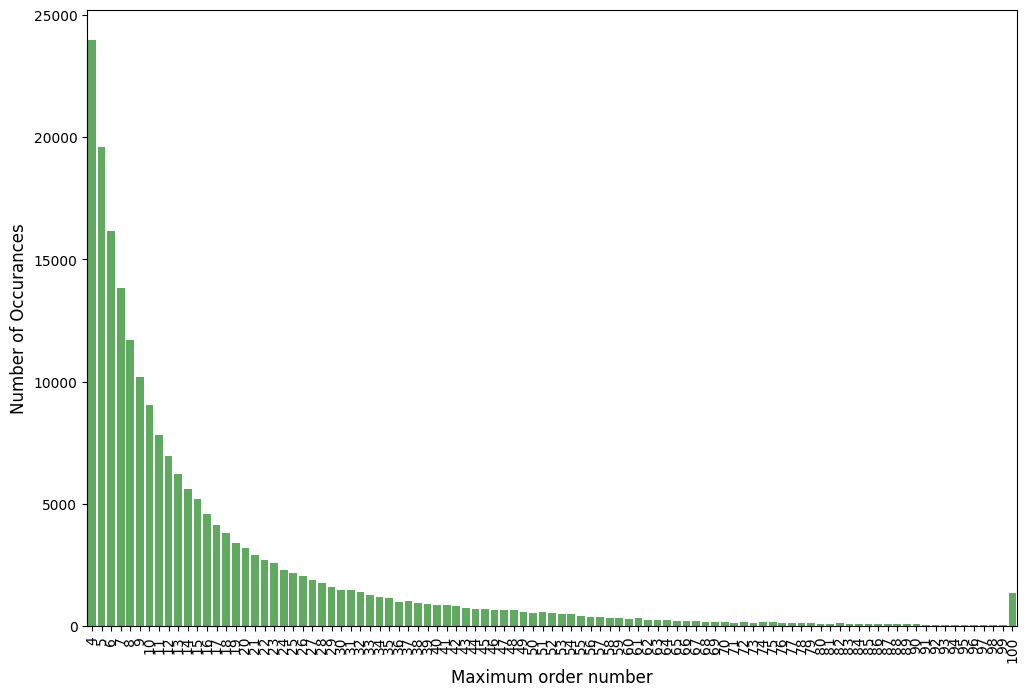

In [ ]:
cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurances', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

해당 그래프를 보면 최소 order는 4번이 있고 최대 100번까지 이루어짐을 알 수 있다.

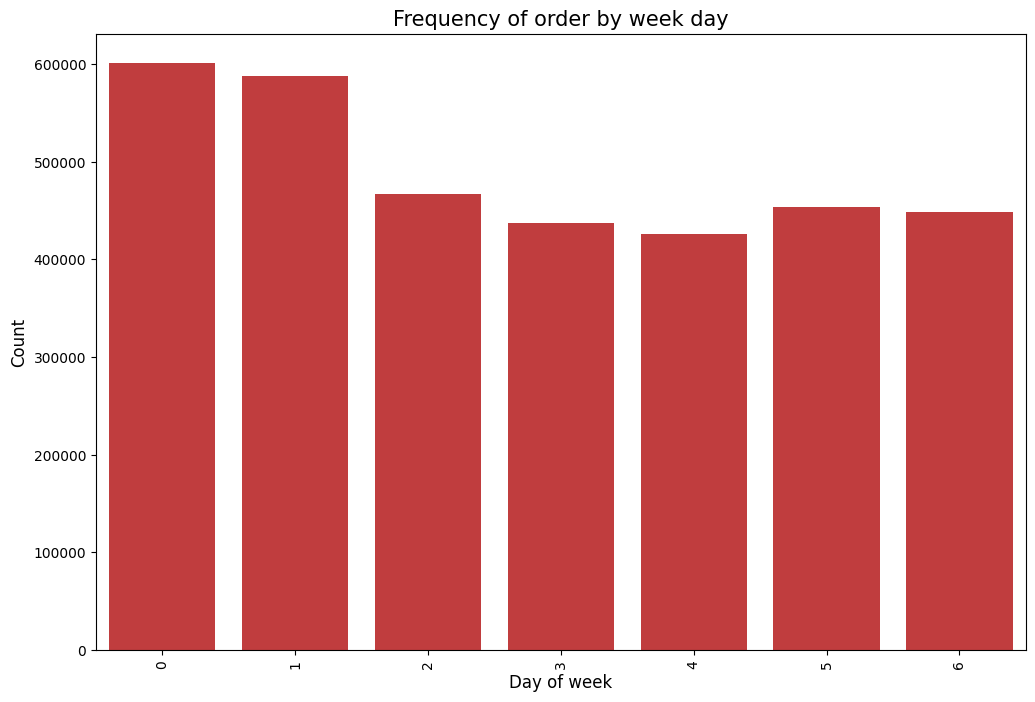

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='order_dow', data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by week day', fontsize=15)
plt.show()

요일별로 주문량을 확인해본 결과, 주말인 0(토요일)과 1(일요일)이 주문량이 많은 것을 확인할 수 있었고, 평일의 경우 4(수요일)이 가장 주문량이 적은 것을 확인할 수 있다.

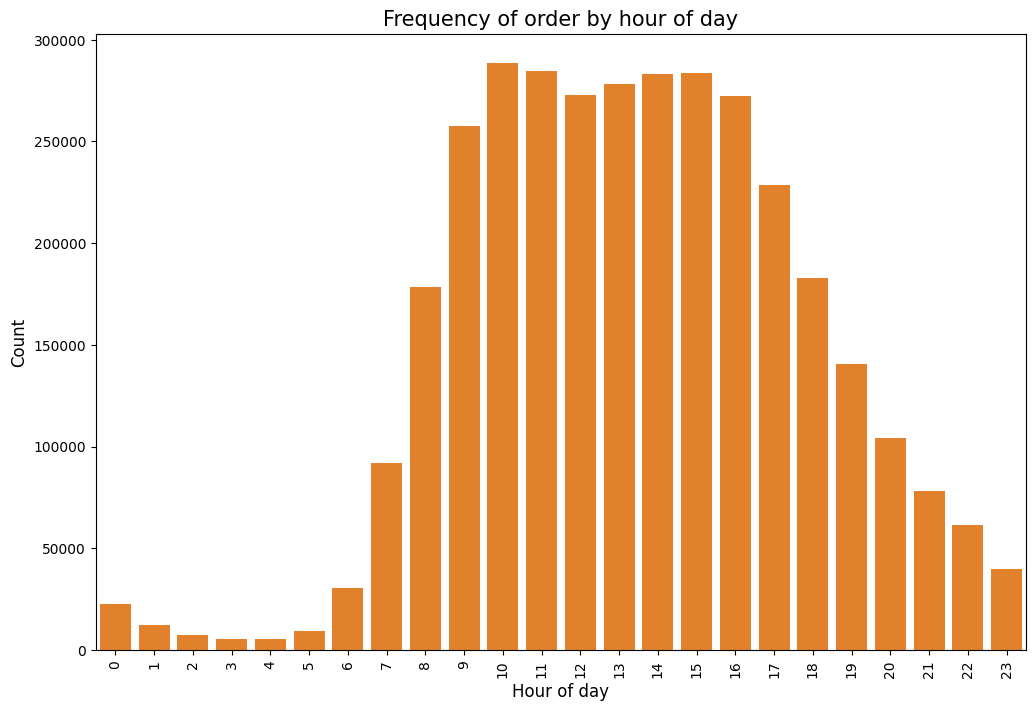

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='order_hour_of_day', data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by hour of day', fontsize=15)
plt.show()

그러다면 하루에서 언제 주문량이 가장 많은지 알아보자. 주문량의 경우 7시부터 서서히 증가하여 낮 시간대인 9시부터 16시까지 주문량이 높은 것을 확인할 수 있고 저녁으로 갈수록 서서히 줄어드는 것을 확인할 수 있다.  

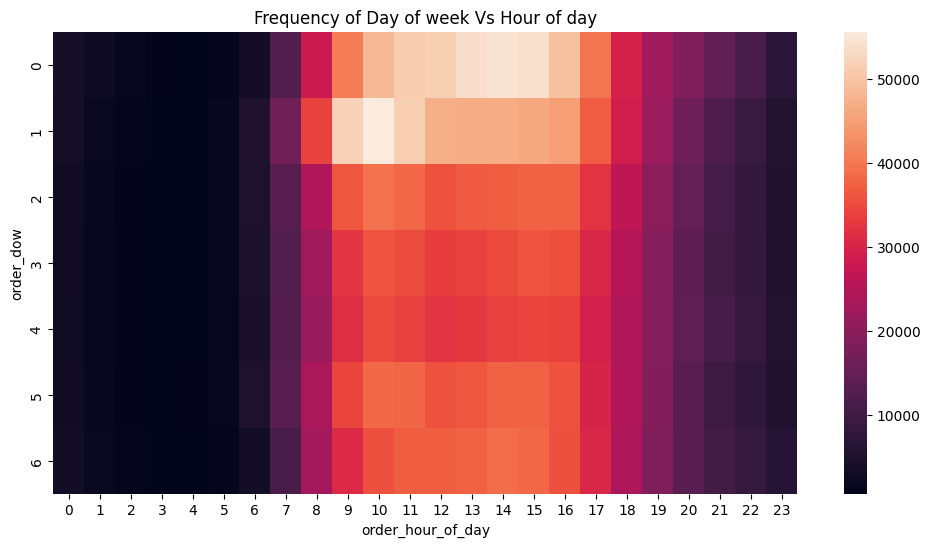

In [ ]:
grouped_df = orders_df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df)
plt.title('Frequency of Day of week Vs Hour of day')
plt.show()


[그래프 유의 사항]
- heatmap은 barplot과 다르게 인자가 x, y, hue가 아닌 index, columns, values로 이루어졌다는 점을 인지해야 한다.

[그래프 해석]
- Heatmap으로 위의 두개의 그래프를 겹쳐본 결과, 평일보다 주말에 주문량이 많은 것을 확인할 수 있으며, 시간대는 낮시간대가 아침이나 저녁시간대보다 주문량이 많은 것을 확인할 수 있다.

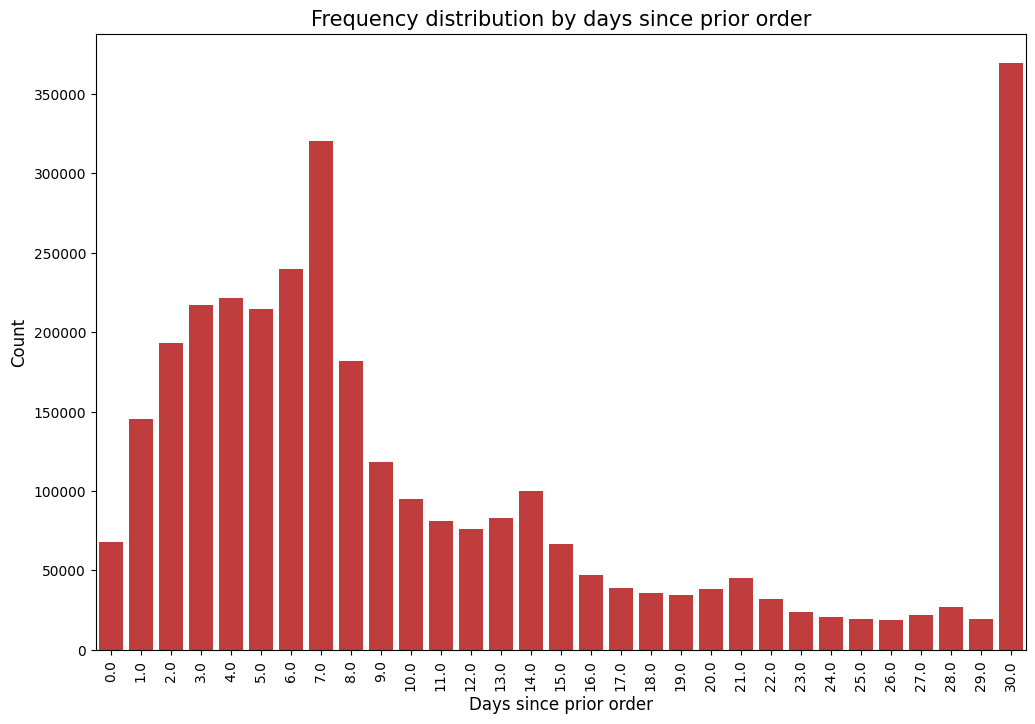

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='days_since_prior_order', data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency distribution by days since prior order', fontsize=15)
plt.show()

이전 주문 후 재주문까지 지난일수를 살펴보게 되면 7과 30에서 peak가 나타남에 따라 재주문은 주단위로 이루어지거나 월단위로 이루어짐을 알 수 있다. 이외에도 14일, 21일, 28일에서 약간의 peak가 나타남에 따라 고객들이 7의 배수단위(1주, 2주, 3주, 4주)로 재주문을 진행한다는 것을 짐작할 수 있다.

In [ ]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5896974667922161)

즉 전고객의 전체 주문수에서 재주문수를 나타내본 결과 약 59%가 재주문이 이루어진 것을 확인할 수 있다.

In [ ]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

np.float64(0.5985944127509629)

train set만 살펴본 결과도 거의 동일하게 약 60%가 재주문이 이루어진 것을 확인할 수 있다.

In [ ]:
grouped_df = order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-17-558cc2e305f0>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1


,count
reordered,
1,0.879151
0,0.120849


[코드 유의사항]
- ix[ ]는 pandas 0.20.0 버전 이후로 삭제되었기 때문에 해당 속성을 이용하는 것이 아닌, 바뀐 loc[ ]이나 iloc[ ] 을 이용해야 한다.

[코드 해석]
- 재주문이 이루어진 물품의 비율와 이루어지지 않은 물품의 비율을 나누어보니 다음과 같았다. 즉, 재주문이 이루어진 물품의 비율은 0.88정도이고, 이루어지지 않은 비율은 0.12정도인 것을 확인할 수 있다.

In [ ]:
grouped_df = order_products_train_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-18-55611de50467>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1


,count
reordered,
1,0.93444
0,0.06556


trainset으로도 확인한 결과 재주문률은 0.93인 것을 알 수 있고, 재주문이 일어나지 않은 물품의 비율은 0.07 정도인 것을 알 수 있다.

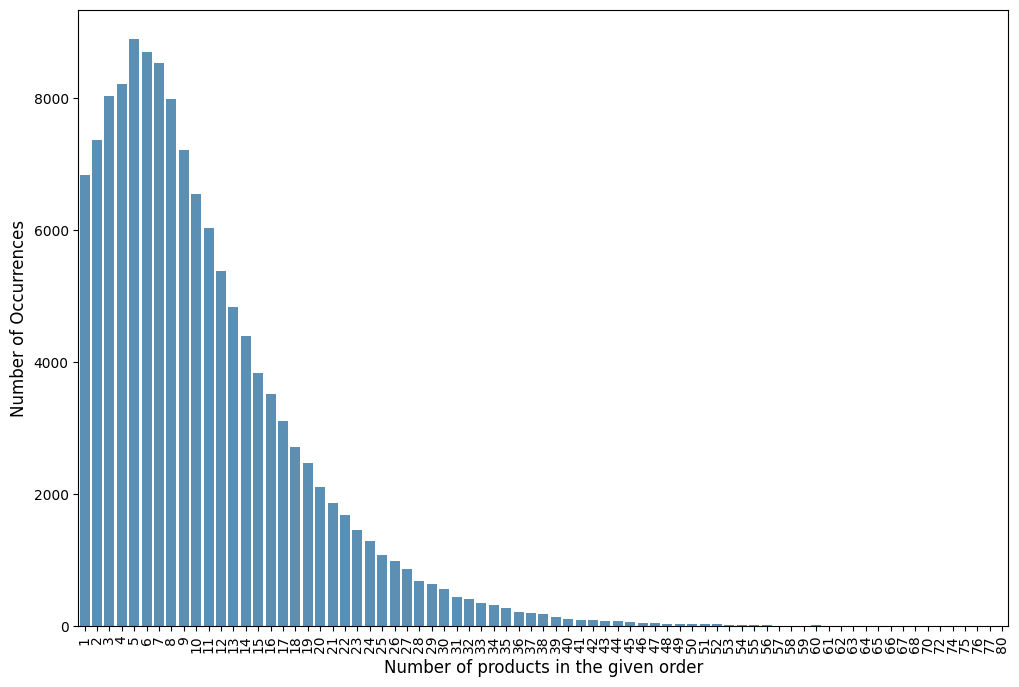

In [ ]:
grouped_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


주문 당 물건을 몇개 정도 구매하는지 확인해 본 결과 5개 정도를 가장 많이 구매하는 것을 알 수 있다.

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


3개의 dataset을 한개의 dataset으로 병합하여 이들의 내용을 더욱 구체화하였다.

In [ ]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


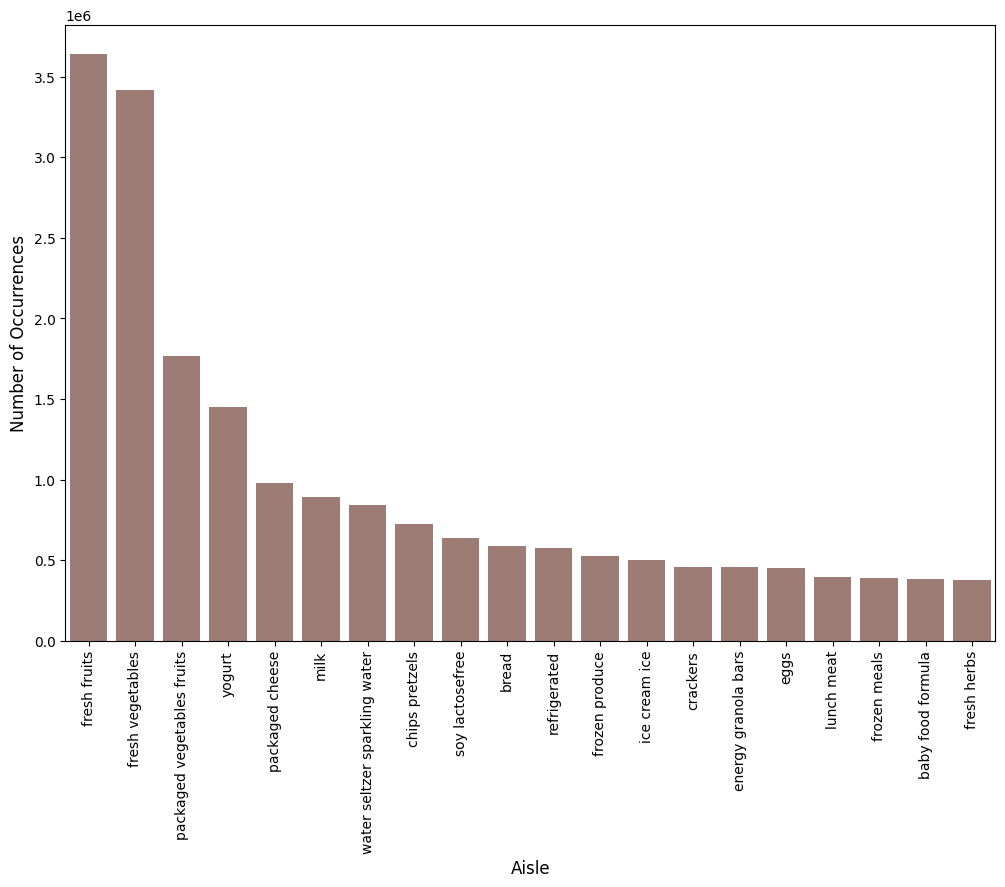

In [ ]:
cnt_srs = order_products_prior_df['aisle'].value_counts().reset_index().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x= cnt_srs['aisle'], y= cnt_srs['count'], alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

[코드 유의사항]
- sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5]) kaggle코드로 돌리니 해당 인자들을 못잡아내는 오류 발생 -> 직접 x와 y를 설정하였지만 그래프가 반대로 가는 상황발생
- 직접 cnt_srs의 dataset을 확인하여 해당 그래프가 어떠한 식으로 구성되는지 확인하고, 해당 dataset의 인자를 직접 x와 y에 지정해줌 => 오류 해결

[코드 해석]
- 해당 그래프를 본 결과, fresh fruit, fresh vegetable이 압도적으로 많은 것을 확인할 수 있었고, 즉 신선 식품을 가장 많이 구매하는 것을 확인할 수 있다.

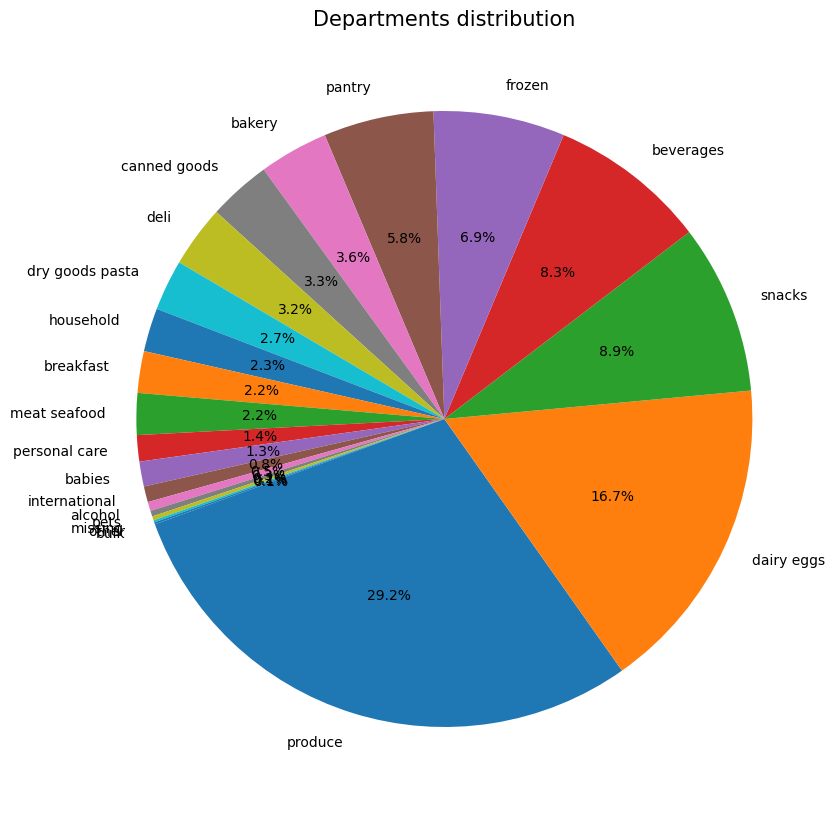

In [ ]:
plt.figure(figsize=(10, 10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
size = (np.array((temp_series / temp_series.sum())*100))
plt.pie(x=size, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('Departments distribution', fontsize=15)
plt.show()

produce가 가장 큰 비중을 차지하고, 다음으로 dairy eggs, snacks가 뒤를 잇는 것을 확인할 수 있다.

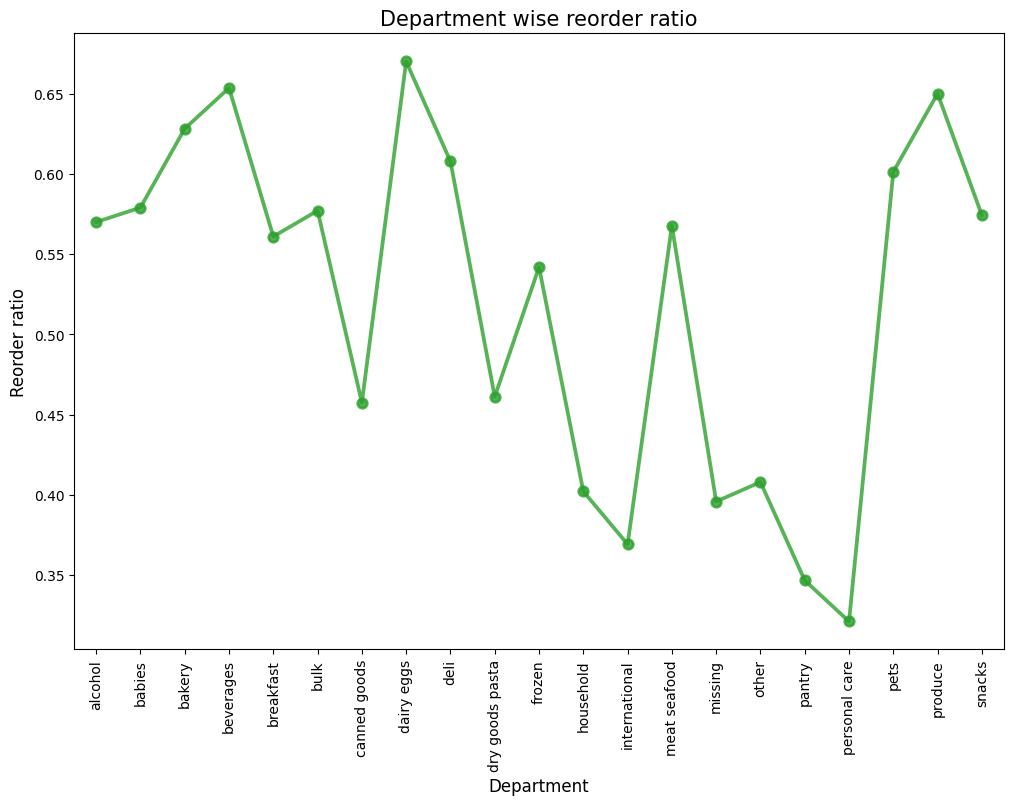

In [ ]:
grouped_df = order_products_prior_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12, 8))
sns.pointplot(x= grouped_df['department'].values, y= grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department wise reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

pointplot으로 확인한 결과, dairy eggs가 가장 높은 재구매비율을 차지하는 것을 확인할 수 있었고, personal care이 가장 낮은 비율을 차지하는 것을 확인할 수 있다.

**Aisle-Reorder Ratio**

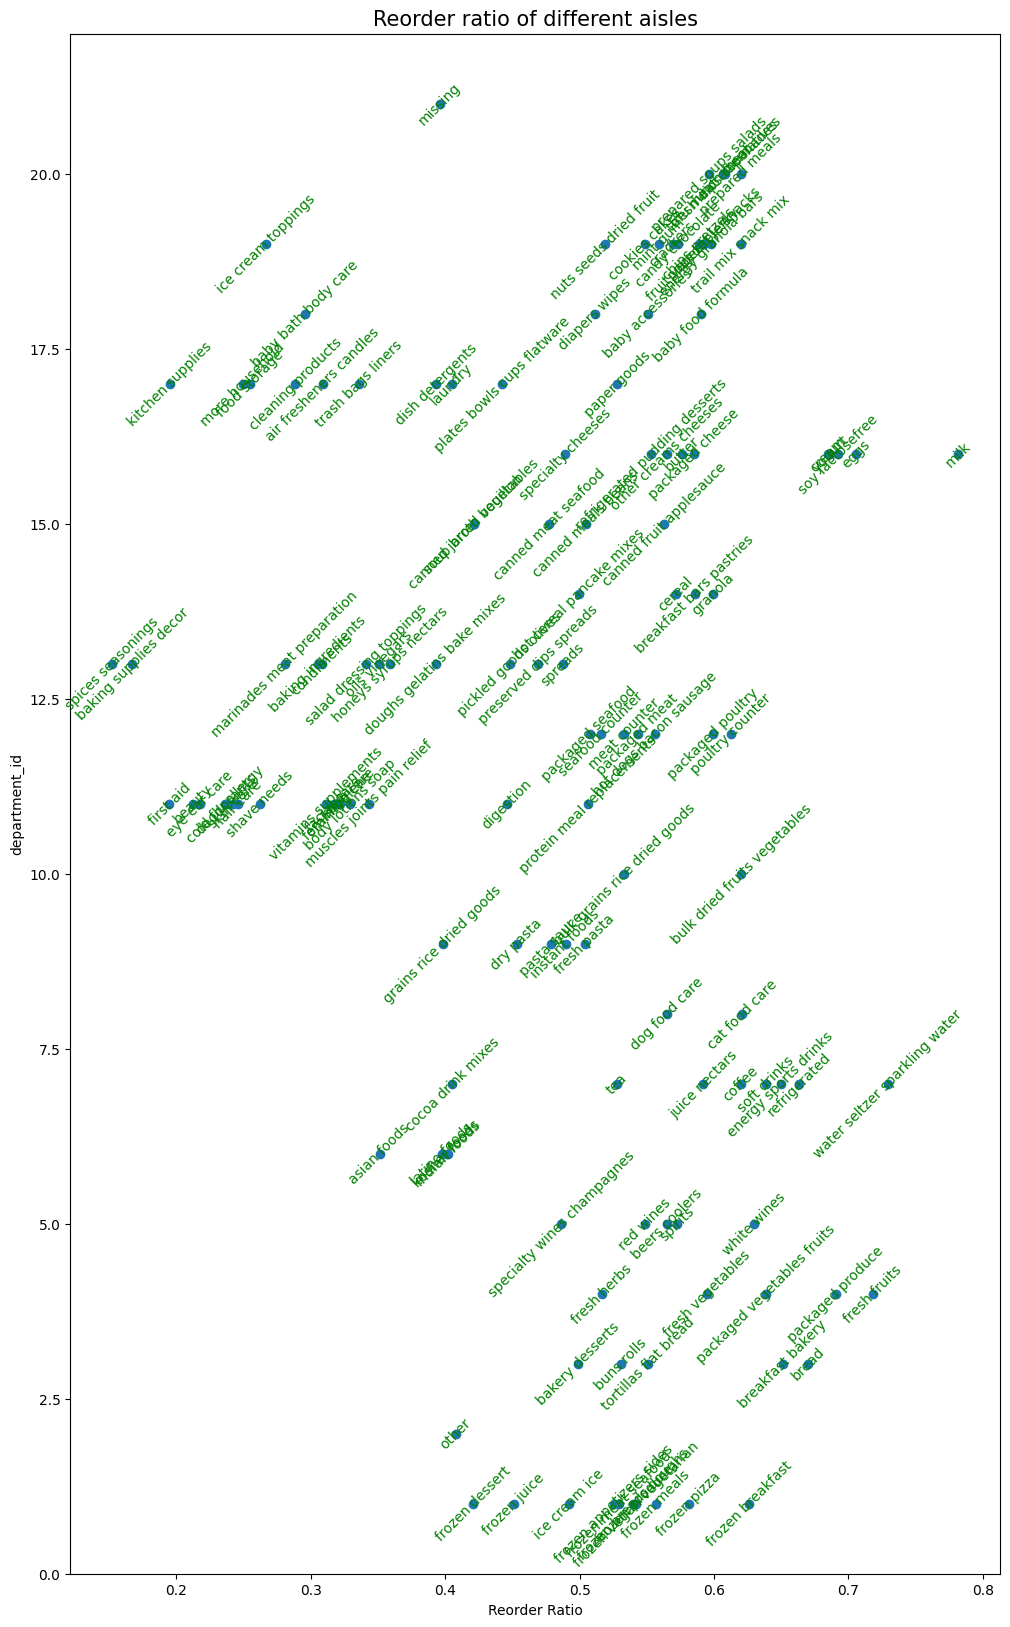

In [ ]:
grouped_df = order_products_prior_df.groupby(['department_id', 'aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize=(12, 20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles', fontsize=15)
plt.show()

**Add to Cart-Reorder ratio**

<ipython-input-29-ffe22004b08b>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70] = 70


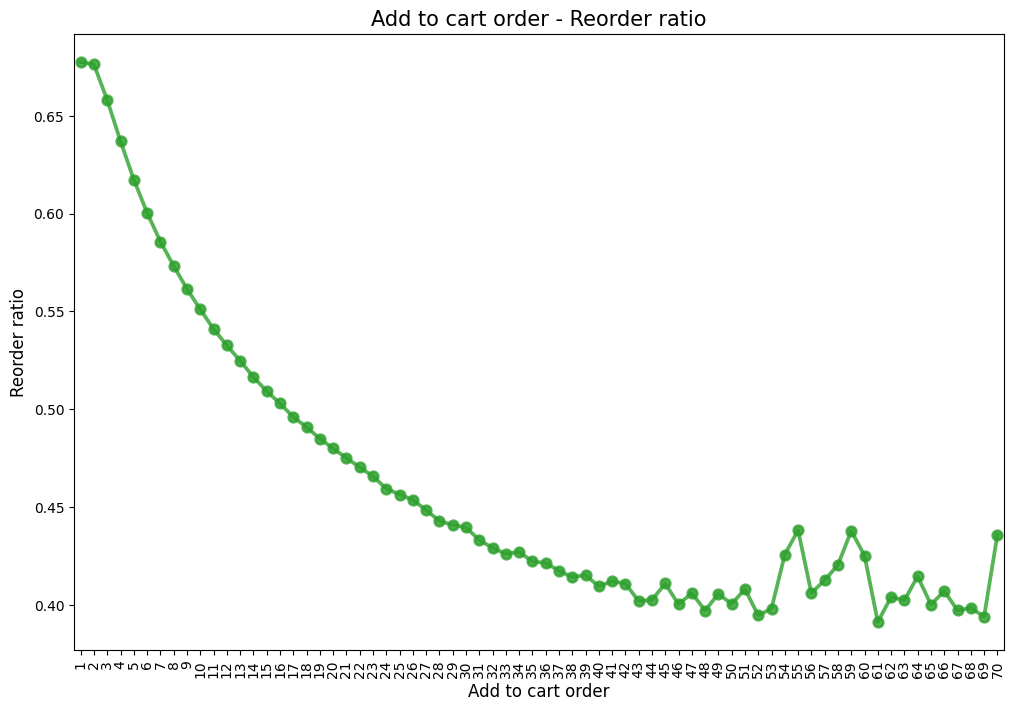

In [ ]:
order_products_prior_df['add_to_cart_order_mod'] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70] = 70
grouped_df = order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12, 8))
sns.pointplot(x= grouped_df['add_to_cart_order_mod'].values, y= grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title('Add to cart order - Reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

위의 그래프를 보면 대체적으로 cart 에 실린 순서대로 재주문량이 많은 것을 확인할 수 있다. 즉, 처음 카트에 담은 것이 고객에게 있어 생필품이라는 것이고, 상대적으로 나중에 채운 것들은 기호품임을 짐작할 수 있다

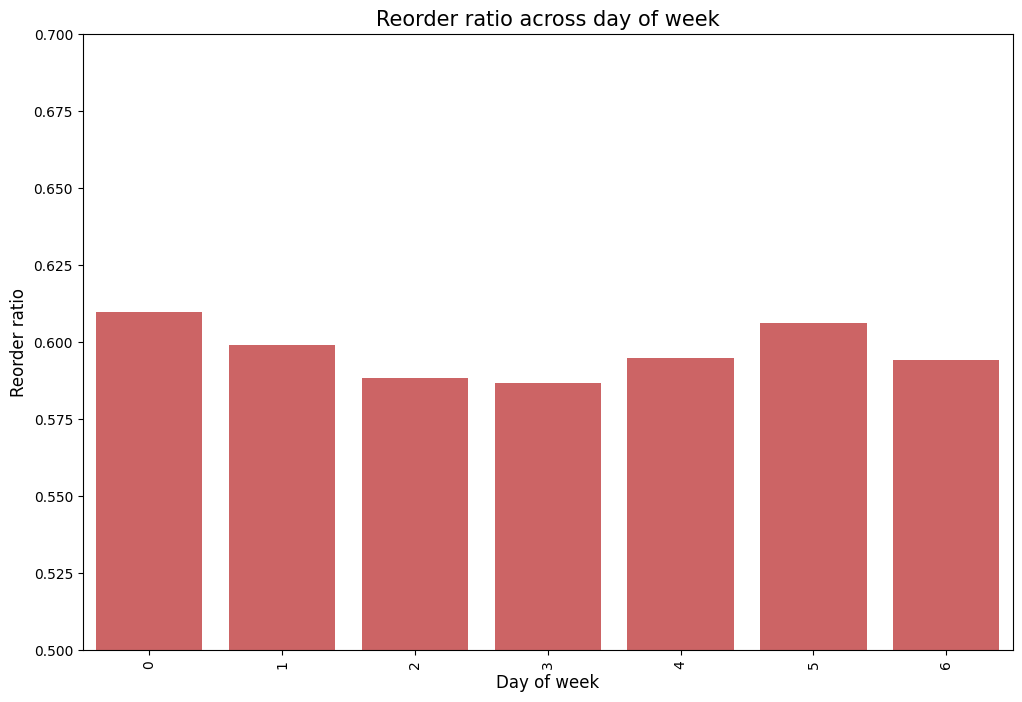

In [ ]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(['order_dow'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x= grouped_df['order_dow'].values, y= grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Reorder ratio across day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

재주문은 상대적으로 토요일과 목요일이 높은 비율을 차지하는 것을 확인할 수 있다.

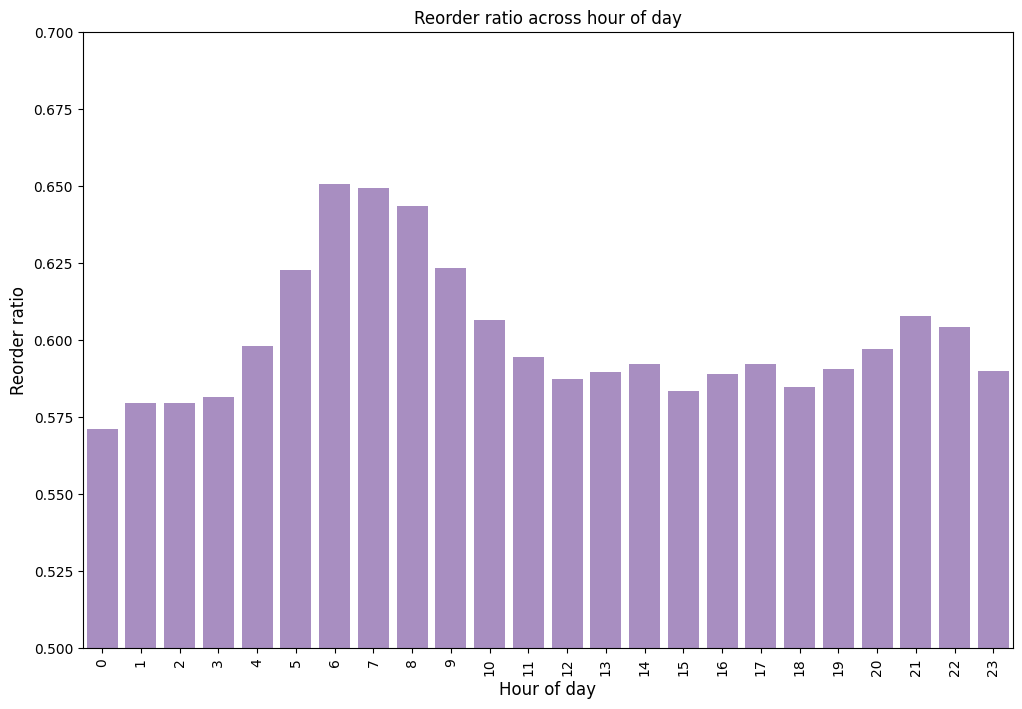

In [ ]:
grouped_df = order_products_train_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x= grouped_df['order_hour_of_day'].values, y= grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title('Reorder ratio across hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

시간대별 재주문 비율을 확인한 결과 오전 5시부터 10시의 오전시간대가 재주문율이 높은 것을 확인할 수 있다.

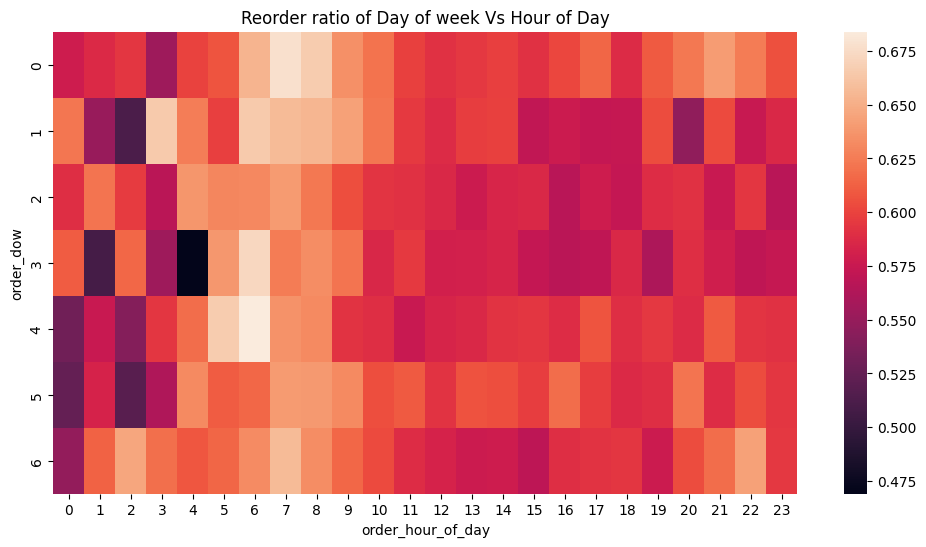

In [ ]:
grouped_df = order_products_train_df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of Day of week Vs Hour of Day')
plt.show()

위의 두 그래프를 합친 heatmap을 그려 주 별 구매 시간대를 확인해보니, 상대적으로 오전 낮시간대에 구매하는 사람이 많은 것을 확인할 수 있다.

# [코드 생성]

  품목 별 구매 시간대를 확인해보자.
  
  품목이 너무 많기 때문에 여기선 top4에 대한 품목 별 구매 시간대를 확인해보도록 하자.  

  먼저 품목별 구매 시간대를 확인하기위해선 품목과 구매시간대가 동시에 나타난 dataset을 형성해야 한다. 다음 코드를 이용하여 품목과 구매시간대가 동시에 나타나도록 설정하자.

In [6]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


해당 dataset을 이용하여 top4 품목으로 dataset을 형성하고, 이에대한 품목4개를 확인해보자.

In [17]:
ais_ohd = order_products_prior_df.groupby('aisle')['order_hour_of_day'].mean().reset_index()

# 상위 4개의 품목으로 dataset을 형성
top4_aisles = order_products_prior_df['aisle'].value_counts().index[:4]
ais_ohd_top4 = order_products_prior_df[order_products_prior_df['aisle'].isin(top4_aisles)]
ais_ohd_top4 = ais_ohd_top4.groupby(['aisle', 'order_hour_of_day']).size().reset_index(name='count')

# 상위 4개의 품목 확인
ais_ohd_top4.iloc[:, 0].unique()

array(['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits',
       'yogurt'], dtype=object)

해당 top4 품목에 대하여 barplot을 형성해보자.

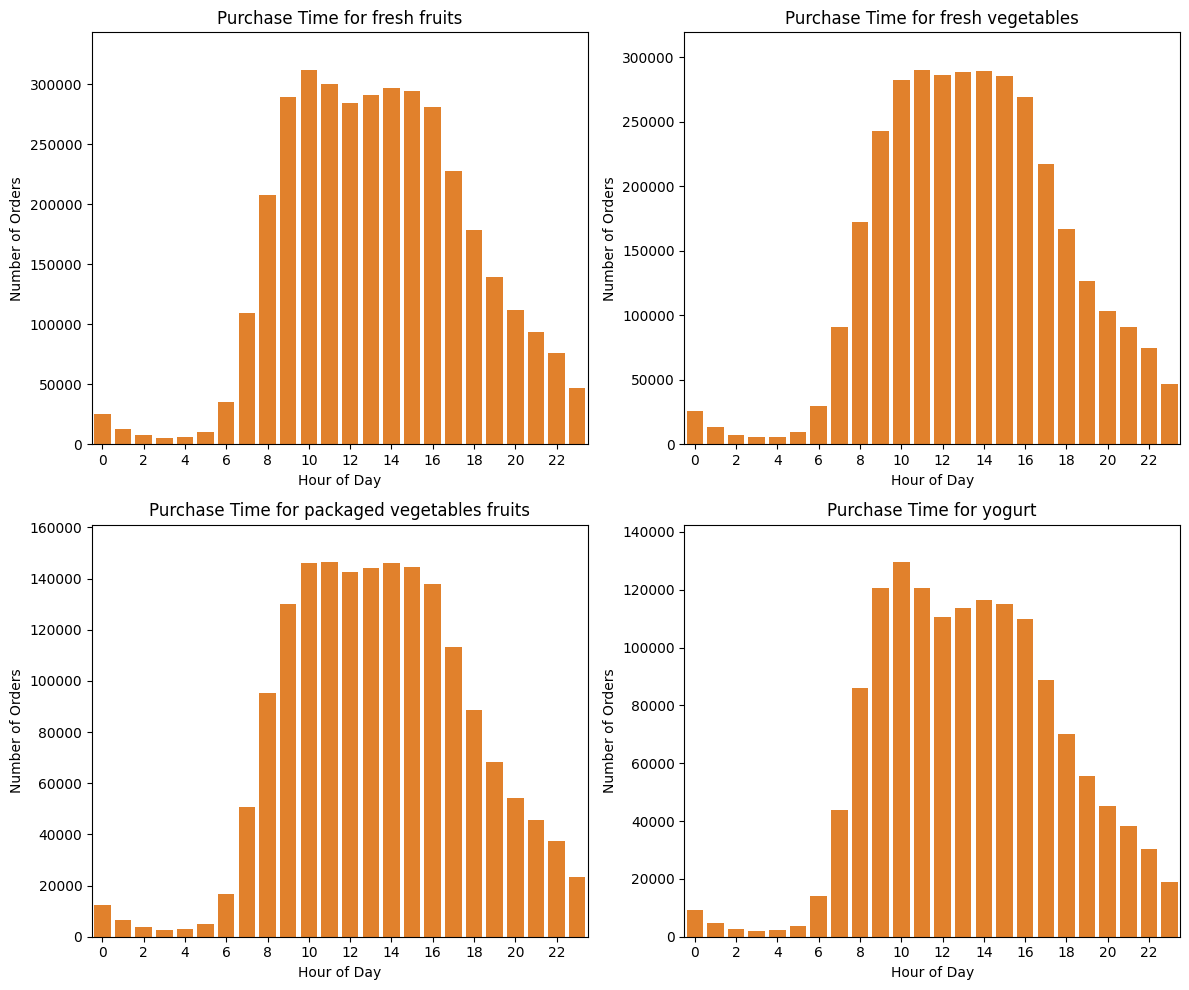

In [15]:
# top4 상품에 대한 subplot을 나타내기 위한 fig, axes 설정
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 각 품목별 barplot 생성
for i, aisle in enumerate(top4_aisles):
    ax = axes[i // 2, i % 2]  # 2x2 서브플롯 좌표 설정
    subset = ais_ohd_top4[ais_ohd_top4['aisle'] == aisle]

    sns.barplot(x=subset['order_hour_of_day'], y=subset['count'], color=color[1], ax=ax)

    ax.set_title(f"Purchase Time for {aisle}", fontsize=12)
    ax.set_xlabel("Hour of Day", fontsize=10)
    ax.set_ylabel("Number of Orders", fontsize=10)
    ax.set_xticks(range(0, 24, 2))  # 2시간 단위로 x축 눈금 설정
    ax.set_ylim(0, subset['count'].max() * 1.1)  # 최대값 기준으로 여유 공간 추가

plt.tight_layout()
plt.show()

즉 이들의 구매 시간대는 8시부터 16시가 가장 높고, 이는 평균 구매시간대와 일치하는 것을 확인할 수 있었다.